# Импорт библиотек и функции

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras import layers

from keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
def plot_training_curves(history):
  loss_values = history.history['loss'] # ошибка на тренировочном наборе
  val_loss_values = history.history['val_loss'] # ошибка на валидационном наборе
  mae_values = history.history['mae']  # mae на тренировочном наборе
  val_mae_values = history.history['val_mae'] # mae на валидационном наборе

  epochs_x = range(1, len(loss_values) + 1) # количество эпох обучения

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

  # график значения функции потерь на каждой эпохе
  ax1.plot(epochs_x, loss_values, 'b', label='Ошибка обучения')
  ax1.plot(epochs_x, val_loss_values, 'r', label='Ошибка валидации')
  ax1.set_title('Ошибка при обучении и валидации', fontsize=14, fontweight="bold")
  ax1.set_xlabel('Эпохи', fontsize=12)
  ax1.set_ylabel('Значение ошибки', fontsize=12)
  ax1.grid()
  ax1.legend()

  # график значения точности на каждой эпохе
  ax2.plot(epochs_x, mae_values, 'b', label='MAE обучения')
  ax2.plot(epochs_x, val_mae_values, 'r', label='MAE валидации')
  ax2.set_title('Точность при обучении и валидации', fontsize=14, fontweight="bold")
  ax2.set_xlabel('Эпохи', fontsize=12)
  ax2.set_ylabel('Значение точности', fontsize=12)
  ax2.grid()
  ax2.legend()

  return

# Функция для подсчета метрик модели регрессии
def generate_preformance_scores(y_true, y_pred):

  mse = mean_squared_error(y_test, y_pred) # расчет mean squared error
  mae = mean_absolute_error(y_test, y_pred) # расчет mean absolute error
  r2 = r2_score(y_test, y_pred) # расчет коэффициента детерминации r2

  print(f'mse:\t{mse:.4f}')
  print(f'mae:\t{mae:.4f}')
  print(f'r2:\t{r2:.4f}')

  return

# Функция для отрисовки графика соответсвия истинных значений предсказанным
def scatter_plot(y_test, y_pred):
  y_pred_list = []
  for i in range(len(y_pred)):
    y_pred_list.append(y_pred[i][0]) # создаем список предсказанных значений

  sns.set_style("whitegrid")
  fig, ax = plt.subplots(figsize=(5, 3))
  ax = sns.scatterplot(x=y_test, y=y_pred_list, alpha=0.5)
  ax = sns.lineplot(x=[0, max(y_test)], y=[0, max(y_test)], color='black')
  ax.set_xlim(0, max(y_test))
  ax.set_ylim(0, max(y_test))
  ax.set_title('График соответсвия истинных значений предсказанным', fontsize=12, fontweight='bold')
  ax.set_xlabel('Истинные значения', fontsize=12)
  ax.set_ylabel('Предсказанные значения', fontsize=12)

# Чтение данных

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/DS_2019_public.csv', encoding="cp1252", encoding_errors='replace') # читаем данные в перменную df
df.head() # выводим первые 5 строк

<ipython-input-59-e4b11ac2c188>:1: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/DS_2019_public.csv', encoding="cp1252", encoding_errors='replace') # читаем данные в перменную df


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [ ]:
print(f"Размер набора данных {df.shape}")

Размер набора данных (10875, 121)


# Исследование данных

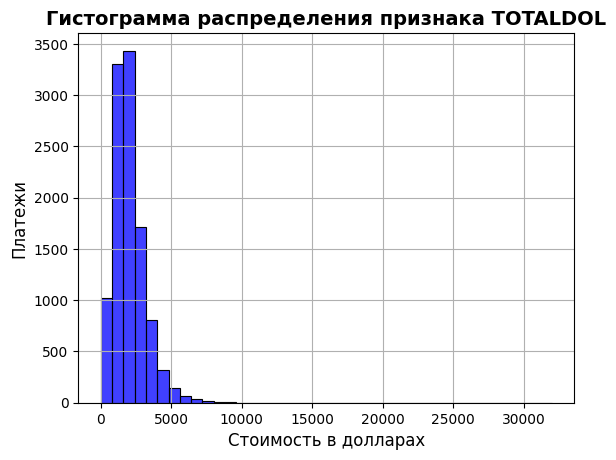

In [ ]:
# гистограмма распределения целевой переменной
sns.histplot(df["TOTALDOL"], bins=40, color='blue')
plt.title('Гистограмма распределения признака TOTALDOL', fontsize=14, fontweight="bold")
plt.xlabel('Стоимость в долларах', fontsize=12)
plt.ylabel('Платежи', fontsize=12)
plt.grid()

In [ ]:
# посмотрим числовые характеристики целевой переменной
df["TOTALDOL"].describe()

count    10875.000000
mean      2040.286437
std       1184.555321
min          6.000000
25%       1273.000000
50%       1831.000000
75%       2543.500000
max      32012.000000
Name: TOTALDOL, dtype: float64

Так как переменных в исходном наборе данных 120, отберем только те переменные, корреляция которых с целевой переменной по модулю больше чем 0.6

In [ ]:
corr = df.corr()
th = 0.6

corr_th = corr["TOTALDOL"][abs(corr["TOTALDOL"]) > th]
corr_th

<ipython-input-35-9782acb222e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


TOTALDOLSPH    0.613712
DOLLAREL       0.800972
DOLELOTH       0.849037
TOTALDOLOTH    0.876769
TOTALDOL       1.000000
TOTALBTU       0.800261
TOTALBTUOTH    0.735435
TOTALDOLWTH    0.615648
BTUELOTH       0.715749
KWH            0.628529
BTUEL          0.628529
TOTALDOLRFG    0.641587
Name: TOTALDOL, dtype: float64

In [ ]:
# прочитаем набор данных с объяснением переменных и посмотрим, что обозначают выбранные
layout_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/public_layout.csv', sep=',')

In [ ]:
# создадим имена переменных и описания переменных в двух отдельных списках
labels = list(layout_data['Variable Label'])
places = list(layout_data['Variable Name'])

# функция для поиска определения переменной
def whatIs(place):
    pl = places.index(place)
    print(place, ' is ', labels[pl])

In [ ]:
# посмотрим на набор данных с выбранными переменными
df = df.drop(corr["TOTALDOL"][abs(corr["TOTALDOL"]) <= th].keys(), axis=1)
df.head()

,DOLELCOL,TOTALDOLSPH,DOLLAREL,DOLELOTH,TOTALDOLOTH,DOLFOSPH,TOTALDOL,DOLELSPH,DOLNGWTH,TOTALBTU,TOTALBTUOTH,CUFEETNGOTH,KWHOTH,TOTALDOLWTH,BTUELOTH,KWH,BTUEL,CUFEETNGWTH,DOLELRFG,TOTALDOLRFG
0,16.793,368,475,337.315,501,0.0,1293,0,286.745,103460,29653,167.601,3655.782,287,12473.544,5148,17565,293.756,120.893,121
1,48.901,582,588,296.353,339,0.0,1327,0,114.618,58716,6781,28.944,1117.878,115,3814.291,2218,7568,77.394,242.746,243
2,101.048,425,952,512.731,534,0.0,1398,0,0.0,76401,20438,19.848,5393.913,179,18403.933,10015,34171,0,158.797,159
3,0,616,705,619.862,620,0.0,1558,0,236.762,59809,8607,0,2522.532,237,8606.856,2869,9789,135.451,85.138,85
4,45.132,685,1050,853.549,893,0.0,1906,0,131.362,114350,21968,41.498,5192.016,131,17714.799,6387,21792,138.574,151.319,151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DOLELCOL     10875 non-null  object 
 1   TOTALDOLSPH  10875 non-null  int64  
 2   DOLLAREL     10875 non-null  int64  
 3   DOLELOTH     10875 non-null  float64
 4   TOTALDOLOTH  10875 non-null  int64  
 5   DOLFOSPH     10875 non-null  object 
 6   TOTALDOL     10875 non-null  int64  
 7   DOLELSPH     10875 non-null  object 
 8   DOLNGWTH     10875 non-null  object 
 9   TOTALBTU     10875 non-null  int64  
 10  TOTALBTUOTH  10875 non-null  int64  
 11  CUFEETNGOTH  10875 non-null  object 
 12  KWHOTH       10875 non-null  object 
 13  TOTALDOLWTH  10875 non-null  int64  
 14  BTUELOTH     10875 non-null  float64
 15  KWH          10875 non-null  int64  
 16  BTUEL        10875 non-null  int64  
 17  CUFEETNGWTH  10875 non-null  object 
 18  DOLELRFG     10875 non-null  object 
 19  TOTA

In [ ]:
# удалим категориальные переменные
df = df.drop(["DOLELCOL", "DOLFOSPH", "DOLELSPH", "DOLNGWTH", "CUFEETNGOTH", "KWHOTH", "CUFEETNGWTH", "CUFEETNGWTH", "DOLELRFG"], axis=1)

In [ ]:
df.shape

(10875, 12)

In [ ]:
# описание выбранных переменных
for col in df.columns.values:
  whatIs(col)

TOTALDOLSPH  is  Total cost for space heating, in whole dollars, 2009
DOLLAREL  is  Total Electricity cost, in whole dollars, 2009
DOLELOTH  is  Electricity cost for other purposes (all end-uses except SPH, COL, WTH, and RFG), in wholedollars, 2009
TOTALDOLOTH  is  Total cost for appliances, electronics, lighting, and miscellaneous uses, in whole dollars, 2009
TOTALDOL  is  Total cost, in whole dollars, 2009
TOTALBTU  is  Total usage, in thousand BTU, 2009
TOTALBTUOTH  is  Total usage for appliances, electronics, lighting, and miscellaneous uses, in thousand BTU, 2009
TOTALDOLWTH  is  Total cost for water heating, in whole dollars, 2009
BTUELOTH  is  Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in thousand BTU, 2009
KWH  is  Total Site Electricity usage, in kilowatt-hours, 2009
BTUEL  is  Total Site Electricity usage, in thousand BTU, 2009
TOTALDOLRFG  is  Total cost for refrigerators, in whole dollars, 2009


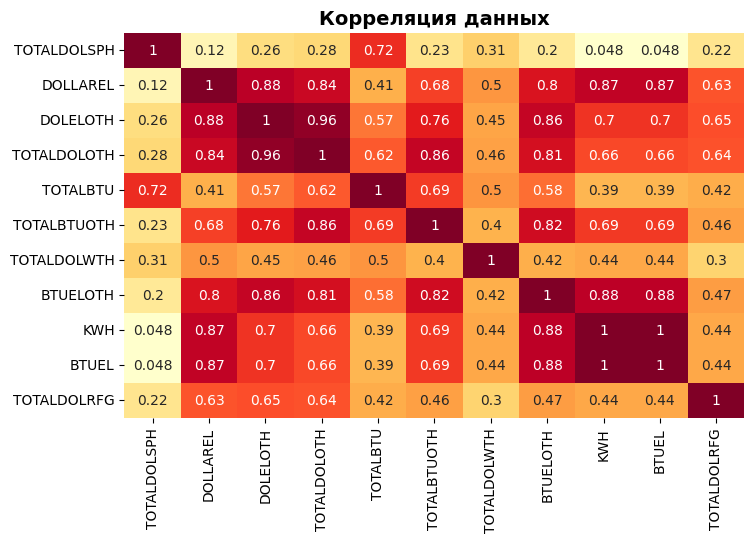

In [ ]:
# корррелция между выбраннными переменными
plt.figure(figsize = (8, 5))
sns.heatmap(df.drop("TOTALDOL", axis=1).corr(), annot=True, cmap ='YlOrRd', cbar=False)
plt.title("Корреляция данных", fontsize=14, fontweight="bold");

# Деление на выборки

In [ ]:
# делим выборку на тренировочную и тестовую
X = df.drop(['TOTALDOL'],axis=1).values # удаляем целевую переменную из общего набора данных
y = df['TOTALDOL'].values # создаем отделтнуб переменную для целевого признака
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # делим набор данных на тренировочный и тестовый в соотношениии 80/20 (train/test)
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size = 0.2, random_state = 0) # делим набор данных на тренировочный и валидационный в соотношениии 80/20 (train/test)

In [ ]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")

Размер тренировочной выборки: (7829, 11)
Размер тестовой выборки: (1088, 11)
Размер валидационной выборки: (1958, 11)


In [ ]:
# проводим стандартизацию данных, для лучшей работы нейронной сети
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Создание модели

In [ ]:
# создадим переменную, которая выполняет функцию ранней остановки,
# если значение ошибки не уменьшается в течение 5 эпох обучения
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

callbacks_list=[early_stop]

## Модель 1

In [ ]:
model1 = keras.Sequential([
    layers.Dense(12, input_dim=X_train.shape[1], activation="relu"), # 1-й слой с 12 нейронами и ФА relu
    layers.Dense(8, activation="relu"), # 2-й слой с 8 нейронами и ФА relu
    layers.Dense(4, activation="relu"), # 3-й слой с 4 нейронами и ФА relu
    layers.Dense(1) # выходной слой с 1 нейроном и линейной ФА, так как задача регрессии
])

In [ ]:
# компиляция модели
model1.compile(optimizer="adam", # оптимизатор adam
              loss="mse", # функция ошибки mse
              metrics=["mae"]) # метрика mae
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Обучение

In [ ]:
history1 = model1.fit(X_train, # признаки
                      y_train, # целевой признак
                      epochs=150, # количество эпох обучения
                      batch_size=32, # размер batch
                      validation_data=(X_val, y_val), # данные для валидации
                      callbacks=callbacks_list # ранняя остановка
                      )

Epoch 1/150
245/245 [==============================] - 4s 9ms/step - loss: 5576118.5000 - mae: 2036.1902 - val_loss: 5394841.0000 - val_mae: 2022.4523
Epoch 2/150
245/245 [==============================] - 2s 8ms/step - loss: 4985177.5000 - mae: 1900.5618 - val_loss: 3925787.7500 - val_mae: 1689.7054
Epoch 3/150
245/245 [==============================] - 2s 6ms/step - loss: 2350700.2500 - mae: 1291.4344 - val_loss: 1247010.3750 - val_mae: 975.8454
Epoch 4/150
245/245 [==============================] - 1s 4ms/step - loss: 943873.5625 - mae: 833.0571 - val_loss: 868396.4375 - val_mae: 767.5521
Epoch 5/150
245/245 [==============================] - 1s 5ms/step - loss: 725474.0000 - mae: 703.6041 - val_loss: 691916.3125 - val_mae: 680.1726
Epoch 6/150
245/245 [==============================] - 1s 5ms/step - loss: 573978.0000 - mae: 618.3925 - val_loss: 544197.6250 - val_mae: 601.2579
Epoch 7/150
245/245 [==============================] - 2s 7ms/step - loss: 438245.6562 - mae: 534.2745 - va

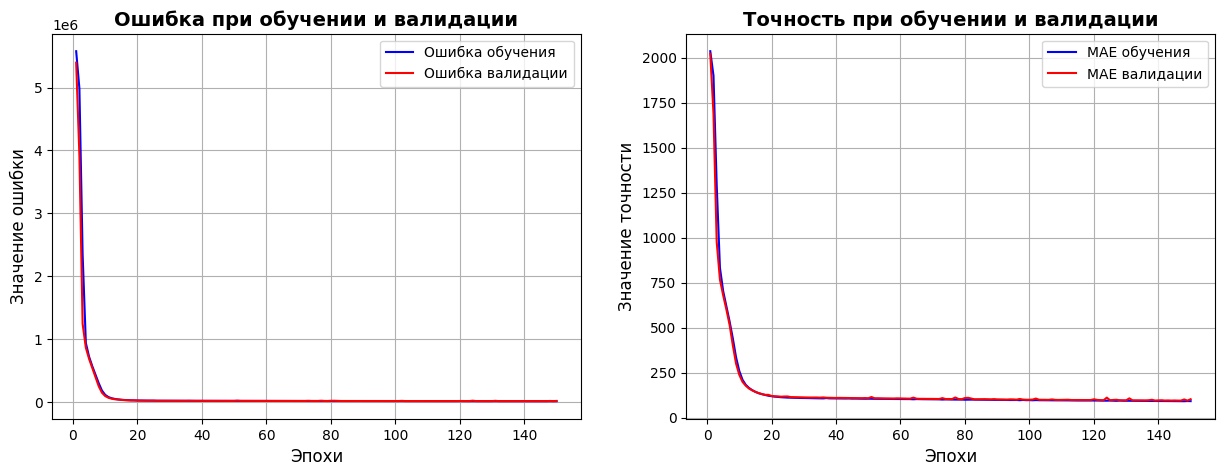

In [ ]:
plot_training_curves(history1)

Видно, что эффекта переобучения на графиках обучения нет

In [ ]:
y_pred = model1.predict(X_test) # обучения модели на тестовом наборе

34/34 [==============================] - 0s 1ms/step


In [ ]:
generate_preformance_scores(y_test, y_pred) # метрики обучения

mse:	20199.7219
mae:	100.3085
r2:	0.9851


Коэффициент детерминации - 98%, это означает, что модель имеет отличную предсказательную способность. Исходя из метрики mae при среднем значении целевой переменной 2040 долларов, модель ошибается в среднем на 100 долларов.

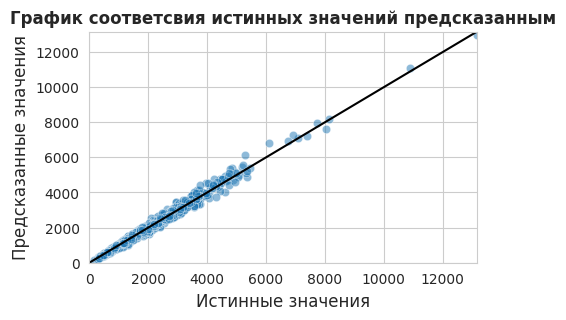

In [ ]:
scatter_plot(y_test, y_pred) # график соответствия истинных значений предсказанным

Видно, что график достаточно линейный

## Модель 2

In [ ]:
model2 = keras.Sequential([
    layers.Dense(12, input_dim=X_train.shape[1], activation="relu"), # 1-й слой с 12 нейронами и ФА relu
    layers.Dense(1) # выходной слой с 1 нейроном и линейной ФА, так как задача регрессии
])

In [ ]:
# компиляция модели
model2.compile(optimizer="adam", # оптимизатор adam
              loss="mse", # функция ошибки mse
              metrics=["mae"]) # метрика mae
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 12)                144       
                                                                 
 dense_5 (Dense)             (None, 1)                 13        
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Обучение

In [ ]:
history2 = model2.fit(X_train, # признаки
                      y_train, # целевой признак
                      epochs=150, # количество эпох обучения
                      batch_size=32, # размер batch
                      validation_data=(X_val, y_val), # данные для валидации
                      callbacks=callbacks_list # ранняя остановка
                      )

Epoch 1/150
245/245 [==============================] - 2s 4ms/step - loss: 5575598.5000 - mae: 2036.3695 - val_loss: 5446069.0000 - val_mae: 2034.6519
Epoch 2/150
245/245 [==============================] - 2s 7ms/step - loss: 5523115.0000 - mae: 2027.2516 - val_loss: 5375575.0000 - val_mae: 2022.3434
Epoch 3/150
245/245 [==============================] - 1s 3ms/step - loss: 5425229.5000 - mae: 2010.9639 - val_loss: 5256227.0000 - val_mae: 2001.8229
Epoch 4/150
245/245 [==============================] - 1s 2ms/step - loss: 5288773.0000 - mae: 1987.2188 - val_loss: 5112818.0000 - val_mae: 1976.0959
Epoch 5/150
245/245 [==============================] - 1s 2ms/step - loss: 5125928.5000 - mae: 1958.1838 - val_loss: 4940936.5000 - val_mae: 1944.6726
Epoch 6/150
245/245 [==============================] - 1s 2ms/step - loss: 4932653.0000 - mae: 1923.5950 - val_loss: 4741690.0000 - val_mae: 1907.5724
Epoch 7/150
245/245 [==============================] - 1s 2ms/step - loss: 4715476.5000 - mae:

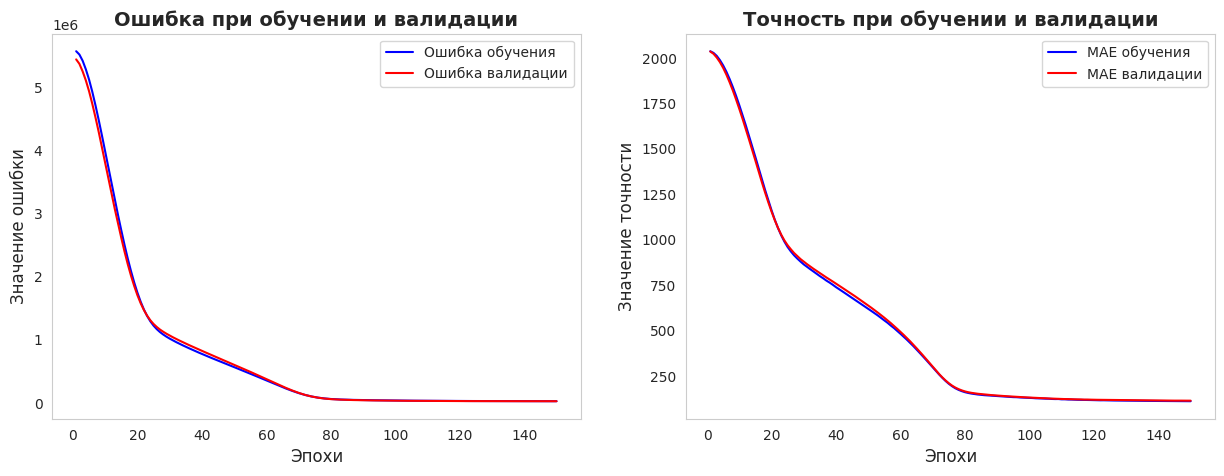

In [ ]:
plot_training_curves(history2)

Видно, что эффекта переобучения на графиках обучения нет

In [ ]:
y_pred = model2.predict(X_test) # обучения модели на тестовом наборе

34/34 [==============================] - 0s 1ms/step


In [ ]:
generate_preformance_scores(y_test, y_pred)# метрики обучения

mse:	24267.5850
mae:	111.4204
r2:	0.9822


Коэффициент детерминации немного хуже по сравнению с предыдущей моделью, но несмотря на это модель имеет отличную предсказательную способность. Метрика mae также увеличилась до средней ошибки 111 долларов. Время обучения немного меньше по сравнению с первой моделью, так как количество весов в нейронной сети меньше.

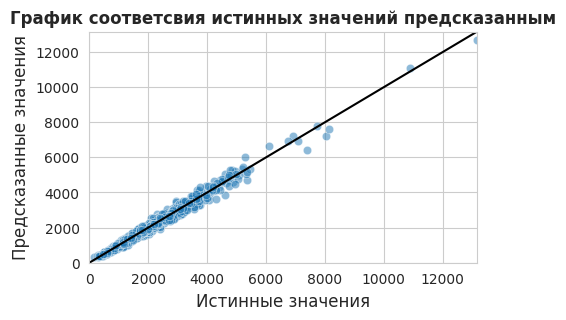

In [ ]:
scatter_plot(y_test, y_pred)

# Другие признаки

Попробуем выбрать признаки корреляция которых по модулю с целевой переменной больше чем 0.8, чтобы проверить как это повляет на обучение

In [ ]:
corr = df.corr()
th=0.8

corr_th = corr["TOTALDOL"][abs(corr["TOTALDOL"]) > th]
corr_th

DOLLAREL       0.800972
DOLELOTH       0.849037
TOTALDOLOTH    0.876769
TOTALDOL       1.000000
TOTALBTU       0.800261
Name: TOTALDOL, dtype: float64

In [ ]:
df = df.drop(corr["TOTALDOL"][abs(corr["TOTALDOL"]) <= th].keys(), axis=1)
df.head()

,DOLLAREL,DOLELOTH,TOTALDOLOTH,TOTALDOL,TOTALBTU
0,475,337.315,501,1293,103460
1,588,296.353,339,1327,58716
2,952,512.731,534,1398,76401
3,705,619.862,620,1558,59809
4,1050,853.549,893,1906,114350


# Деление на выборки

In [ ]:
# делим выборку на тренировочную и тестовую
X = df.drop(['TOTALDOL'],axis=1).values # удаляем целевую переменную из общего набора данных
y = df['TOTALDOL'].values # создаем отделтнуб переменную для целевого признака
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) # делим набор данных на тренировочный и тестовый в соотношениии 80/20 (train/test)
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size = 0.2, random_state = 0) # делим набор данных на тренировочный и валидационный в соотношениии 80/20 (train/test)

In [ ]:
print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Размер валидационной выборки: {X_val.shape}")

Размер тренировочной выборки: (7829, 4)
Размер тестовой выборки: (1088, 4)
Размер валидационной выборки: (1958, 4)


In [ ]:
# проводим стандартизацию данных, для лучшей работы нейронной сети
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Создание модели

## Модель 1

In [ ]:
model1 = keras.Sequential([
    layers.Dense(12, input_dim=X_train.shape[1], activation="relu"), # 1-й слой с 12 нейронами и ФА relu
    layers.Dense(8, activation="relu"), # 2-й слой с 8 нейронами и ФА relu
    layers.Dense(4, activation="relu"), # 3-й слой с 4 нейронами и ФА relu
    layers.Dense(1) # выходной слой с 1 нейроном и линейной ФА, так как задача регрессии
])

In [ ]:
# компиляция модели
model1.compile(optimizer="adam", # оптимизатор adam
              loss="mse", # функция ошибки mse
              metrics=["mae"]) # метрика mae
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                60        
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 205 (820.00 Byte)
Trainable params: 205 (820.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Обучение

In [ ]:
history1 = model1.fit(X_train, # признаки
                      y_train, # целевой признак
                      epochs=150, # количество эпох обучения
                      batch_size=32, # размер batch
                      validation_data=(X_val, y_val), # данные для валидации
                      callbacks=callbacks_list # ранняя остановка
                      )

Epoch 1/150
245/245 [==============================] - 2s 3ms/step - loss: 5566621.0000 - mae: 2035.0293 - val_loss: 5381010.5000 - val_mae: 2021.9733
Epoch 2/150
245/245 [==============================] - 1s 2ms/step - loss: 5084651.5000 - mae: 1929.7415 - val_loss: 4139165.5000 - val_mae: 1739.6848
Epoch 3/150
245/245 [==============================] - 1s 2ms/step - loss: 2512569.2500 - mae: 1325.1296 - val_loss: 1106488.2500 - val_mae: 911.0861
Epoch 4/150
245/245 [==============================] - 1s 2ms/step - loss: 720504.5000 - mae: 698.9825 - val_loss: 540028.3750 - val_mae: 597.0362
Epoch 5/150
245/245 [==============================] - 1s 2ms/step - loss: 443321.0625 - mae: 519.4528 - val_loss: 357593.3125 - val_mae: 454.6260
Epoch 6/150
245/245 [==============================] - 1s 2ms/step - loss: 300889.0000 - mae: 408.4203 - val_loss: 242355.9531 - val_mae: 367.6823
Epoch 7/150
245/245 [==============================] - 1s 2ms/step - loss: 213758.1562 - mae: 339.9234 - va

Обучение остановилось на 47 эпохе, это значит что ошибка модели не уменьшалась уже на протяжении 5 эпох, что могло бы привести к переобучению

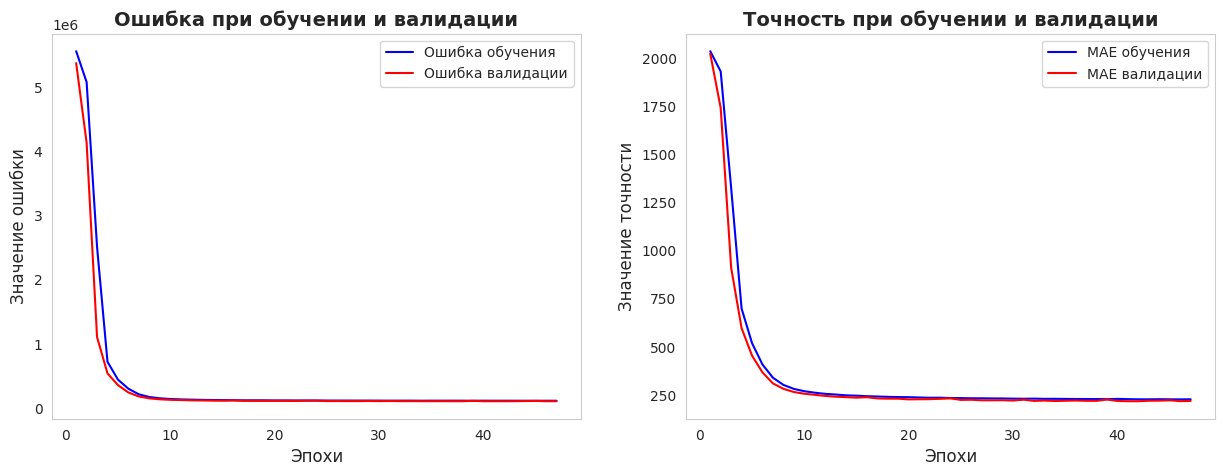

In [ ]:
plot_training_curves(history1)

In [ ]:
y_pred = model1.predict(X_test) # обучения модели на тестовом наборе

34/34 [==============================] - 0s 1ms/step


In [ ]:
generate_preformance_scores(y_test, y_pred) # метрики обучения

mse:	112807.9954
mae:	225.7616
r2:	0.9170


Из метрик видно, что значения mse и mae сильно увеличись, это не очень хорошо, так как решается задача регрессии, коэффициент детерминации уменьшился до 91%. Можно сделать вывод, что уменьшение количества входных признаков негативно сказывается на предсказательной способности модели

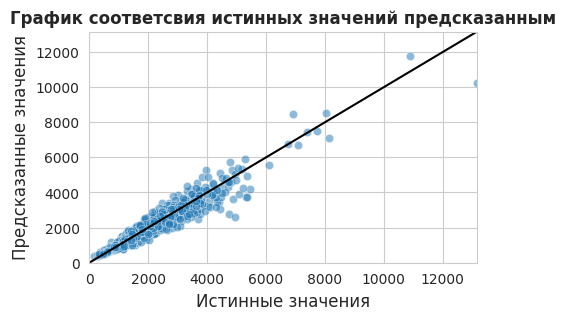

In [ ]:
scatter_plot(y_test, y_pred)